In [1]:
import networkx as nx
from pykeen.pipeline import pipeline
from pykeen.datasets import Nations, get_dataset
import matplotlib.pyplot as plt
import matplotlib as mpl
import torch
from pykeen.models import predict
import json


In [2]:
from pykeen.hpo import hpo_pipeline
import os
from pykeen.triples import TriplesFactory


NATIONS_TRAIN_PATH = "20_social_graph_service_0.tsv"
NATIONS_TEST_PATH = "20_social_graph_service_1.tsv"
NATIONS_VALIDATE_PATH = "20_social_graph_service_2.tsv"


training = TriplesFactory.from_path(NATIONS_TRAIN_PATH)
testing = TriplesFactory.from_path(
    NATIONS_TEST_PATH,
    entity_to_id=training.entity_to_id,
    relation_to_id=training.relation_to_id,
)
validation = TriplesFactory.from_path(
    NATIONS_VALIDATE_PATH,
    entity_to_id=training.entity_to_id,
    relation_to_id=training.relation_to_id,
)
pipeline_result = pipeline(
#    n_trials=3,  # you probably want more than this
    training=training,
    testing=testing,
    validation=validation,
    model='TransE',
    epochs=5,  # short epochs for testing - you should go higher
    random_seed = 1234
)
pipeline_result.save_to_directory(os.getcwd()+'/prova_transE')

No cuda devices were available. The model runs on CPU


Training epochs on cpu:   0%|          | 0/5 [00:00<?, ?epoch/s]

Training batches on cpu:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/1 [00:00<?, ?batch/s]

Training batches on cpu:   0%|          | 0/1 [00:00<?, ?batch/s]

INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/9.00 [00:00<?, ?triple/s]

INFO:pykeen.evaluation.evaluator:Evaluation took 0.08s seconds
INFO:pykeen.triples.triples_factory:Stored TriplesFactory(num_entities=3, num_relations=9, create_inverse_triples=False, num_triples=9, path="C:\Users\gianl\OneDrive - Politecnico di Milano\Master Thesis\python\dataset\20_social_graph_service_0.tsv") to file:///C:/Users/gianl/OneDrive%20-%20Politecnico%20di%20Milano/Master%20Thesis/python/dataset/prova_transE/training_triples
INFO:pykeen.pipeline.api:Saved to directory: file:///C:/Users/gianl/OneDrive%20-%20Politecnico%20di%20Milano/Master%20Thesis/python/dataset/prova_transE


In [3]:
help(pipeline_result)

Help on PipelineResult in module pykeen.pipeline.api object:

class PipelineResult(pykeen.utils.Result)
 |  PipelineResult(random_seed: int, model: pykeen.models.base.Model, training: pykeen.triples.triples_factory.CoreTriplesFactory, training_loop: pykeen.training.training_loop.TrainingLoop, losses: List[float], metric_results: pykeen.evaluation.evaluator.MetricResults, train_seconds: float, evaluate_seconds: float, stopper: Optional[pykeen.stoppers.stopper.Stopper] = None, configuration: Mapping[str, Any] = <factory>, metadata: MutableMapping[str, Any] = <factory>, version: str = <factory>, git_hash: str = <factory>) -> None
 |  
 |  A dataclass containing the results of running :func:`pykeen.pipeline.pipeline`.
 |  
 |  Method resolution order:
 |      PipelineResult
 |      pykeen.utils.Result
 |      abc.ABC
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __eq__(self, other)
 |  
 |  __init__(self, random_seed: int, model: pykeen.models.base.Model, training: pykeen

In [4]:
pipeline_result.metric_results.to_dict()

{'head': {'optimistic': {'inverse_harmonic_mean_rank': 0.8703703703703702,
   'inverse_geometric_mean_rank': 0.8194807381480528,
   'variance': 0.4444444444444444,
   'median_absolute_deviation': 0.0,
   'adjusted_inverse_harmonic_mean_rank': 0.6666666666666665,
   'adjusted_arithmetic_mean_rank_index': 0.6666666666666667,
   'standard_deviation': 0.6666666666666666,
   'count': 9.0,
   'z_inverse_harmonic_mean_rank': 2.7456258919345746,
   'adjusted_arithmetic_mean_rank': 0.6666666666666666,
   'adjusted_geometric_mean_rank_index': 0.7370974924752878,
   'median_rank': 1.0,
   'arithmetic_mean_rank': 1.3333333333333333,
   'geometric_mean_rank': 1.2202849358728105,
   'inverse_median_rank': 1.0,
   'z_arithmetic_mean_rank': 2.4494897427831788,
   'z_geometric_mean_rank': 2.2297856045790088,
   'harmonic_mean_rank': 1.148936170212766,
   'inverse_arithmetic_mean_rank': 0.75,
   'hits_at_1': 0.7777777777777778,
   'hits_at_3': 1.0,
   'hits_at_5': 1.0,
   'hits_at_10': 1.0,
   'z_hits_a

<AxesSubplot:title={'center':'Losses Plot'}, xlabel='Epoch', ylabel='marginranking Loss'>

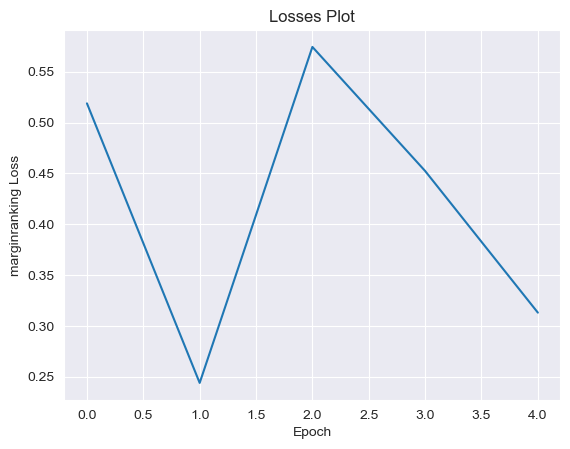

In [5]:
pipeline_result.plot_losses()

In [6]:
model = pipeline_result.model
# Predict tails
predicted_tails_df = predict.get_prediction_df(
    model=model, head_label = "user-service", relation_label="get_user_id_server", triples_factory=pipeline_result.training,
)


predicted_tails_df

,tail_id,tail_label,score,in_training
2,2,user-service,-5.823895,False
1,1,social-graph-service,-9.602411,True
0,0,nginx-web-server,-10.023479,False


In [7]:
# Predict relations
predicted_relations_df = predict.get_prediction_df(
    model=model, head_label="user-service", tail_label="user-service", triples_factory=pipeline_result.training,
)
predicted_relations_df

,relation_id,relation_label,score,in_training
4,4,get_user_id_server,-5.823895,False
3,3,follow_with_username_server,-5.824523,False
1,1,Follow,-5.927852,False
2,2,follow_server,-5.965435,False
6,6,social_graph_mongo_update_client,-6.206998,False
7,7,social_graph_redis_update_client,-6.237367,False
0,0,/wrk2-api/user/follow,-6.250849,False
8,8,user_mmc_get_user_id_client,-6.321355,True
5,5,mongo_update_client,-6.402029,False


In [8]:
# Predict heads
predicted_heads_df = predict.get_prediction_df(
    model=model, relation_label="get_user_id_server", tail_label="user-service", triples_factory=pipeline_result.training
)
predicted_heads_df

,head_id,head_label,score,in_training
2,2,user-service,-5.823895,False
1,1,social-graph-service,-10.022802,False
0,0,nginx-web-server,-10.277517,False


In [9]:
# Score all triples (memory intensive)
predictions_df = predict.get_all_prediction_df(model, triples_factory=pipeline_result.training)
predictions_df

scoring:   0%|          | 0.00/27.0 [00:00<?, ?batch/s]

,head_id,head_label,relation_id,relation_label,tail_id,tail_label,score,in_training
0,2,user-service,4,get_user_id_server,2,user-service,-5.823895,False
1,0,nginx-web-server,4,get_user_id_server,0,nginx-web-server,-5.823895,False
2,1,social-graph-service,4,get_user_id_server,1,social-graph-service,-5.823895,False
3,2,user-service,3,follow_with_username_server,2,user-service,-5.824523,False
4,1,social-graph-service,3,follow_with_username_server,1,social-graph-service,-5.824523,False
...,...,...,...,...,...,...,...,...
76,2,user-service,5,mongo_update_client,0,nginx-web-server,-10.698528,False
77,0,nginx-web-server,0,/wrk2-api/user/follow,1,social-graph-service,-10.793466,False
78,2,user-service,1,Follow,1,social-graph-service,-11.090796,False
79,0,nginx-web-server,0,/wrk2-api/user/follow,2,user-service,-11.332861,False


In [10]:
# Score top K triples (computationally expensive)
top_k_predictions_df = predict.get_all_prediction_df(model, k=10, triples_factory=pipeline_result.training)
top_k_predictions_df

scoring:   0%|          | 0.00/27.0 [00:00<?, ?batch/s]

,head_id,head_label,relation_id,relation_label,tail_id,tail_label,score,in_training
0,0,nginx-web-server,4,get_user_id_server,0,nginx-web-server,-5.823895,False
1,1,social-graph-service,4,get_user_id_server,1,social-graph-service,-5.823895,False
2,2,user-service,4,get_user_id_server,2,user-service,-5.823895,False
3,0,nginx-web-server,3,follow_with_username_server,0,nginx-web-server,-5.824523,False
4,1,social-graph-service,3,follow_with_username_server,1,social-graph-service,-5.824523,False
5,2,user-service,3,follow_with_username_server,2,user-service,-5.824523,False
6,0,nginx-web-server,1,Follow,0,nginx-web-server,-5.927852,True
7,1,social-graph-service,1,Follow,1,social-graph-service,-5.927852,False
8,2,user-service,1,Follow,2,user-service,-5.927852,False
9,0,nginx-web-server,2,follow_server,0,nginx-web-server,-5.965435,False


In [11]:
# Score a given list of triples
score_df = predict.predict_triples_df(
    model=model,
    triples=[('user-service', 'user_mmc_get_user_id_client', 'user-service'), ('user-service', 'get_user_id_server', 'social-graph-service')],
    triples_factory=pipeline_result.training,
)
score_df

,head_id,head_label,relation_id,relation_label,tail_id,tail_label,score
0,2,user-service,4,get_user_id_server,1,social-graph-service,-9.602411
1,2,user-service,8,user_mmc_get_user_id_client,2,user-service,-6.321355


## Evaluation
If the results are the same, it means that the traces are the same

In [12]:
from pykeen.evaluation import evaluate, ClassificationEvaluator
results_training = evaluate(model=model,mapped_triples=pipeline_result.training.mapped_triples,evaluator = ClassificationEvaluator(),mode=None,additional_filter_triples=[pipeline_result.training.mapped_triples])
results_training.to_dict()

INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/9.00 [00:00<?, ?triple/s]

C:\Users\gianl\anaconda3\envs\MasterThesis\lib\site-packages\rexmex\metrics\classification.py:484: RuntimeWarning: invalid value encountered in power
  pthr = (fpr**0.5) / (fpr**0.5 + tpr**0.5)
C:\Users\gianl\anaconda3\envs\MasterThesis\lib\site-packages\rexmex\metrics\classification.py:547: RuntimeWarning: invalid value encountered in power
  fm = (ppv * tpr) ** 0.5
INFO:pykeen.evaluation.evaluator:Evaluation took 0.05s seconds


{'true_negative_rate': 10.239038467407227,
 'true_positive_rate': -6.893648147583008,
 'positive_predictive_value': 0.2717059254646301,
 'negative_predictive_value': 0.721777617931366,
 'false_negative_rate': 7.893648147583008,
 'false_positive_rate': -9.239038467407227,
 'false_discovery_rate': 0.7282940745353699,
 'false_omission_rate': 0.27822235226631165,
 'positive_likelihood_ratio': 0.7461434602737427,
 'negative_likelihood_ratio': 0.7709364891052246,
 'prevalence_threshold': nan,
 'threat_score': 0.39441683888435364,
 'fowlkes_mallows_index': nan,
 'informedness': 2.3453903198242188,
 'markedness': -0.006516456604003906,
 'diagnostic_odds_ratio': 0.9678403735160828,
 'roc_auc_score': 0.8179012345679012,
 'accuracy_score': 0.8518518518518519,
 'balanced_accuracy_score': 0.8333333333333333,
 'f1_score': 0.7777777777777778,
 'average_precision_score': 0.594685657041979,
 'matthews_correlation_coefficient': 0.6666666666666666}

In [13]:
results_validation = evaluate(model=model,mapped_triples=validation.mapped_triples,evaluator = ClassificationEvaluator(),mode=None,additional_filter_triples=[pipeline_result.training.mapped_triples])
results_validation.to_dict()

INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/9.00 [00:00<?, ?triple/s]

C:\Users\gianl\anaconda3\envs\MasterThesis\lib\site-packages\rexmex\metrics\classification.py:484: RuntimeWarning: invalid value encountered in power
  pthr = (fpr**0.5) / (fpr**0.5 + tpr**0.5)
C:\Users\gianl\anaconda3\envs\MasterThesis\lib\site-packages\rexmex\metrics\classification.py:547: RuntimeWarning: invalid value encountered in power
  fm = (ppv * tpr) ** 0.5
INFO:pykeen.evaluation.evaluator:Evaluation took 0.04s seconds


{'true_negative_rate': 10.239038467407227,
 'true_positive_rate': -6.893648147583008,
 'positive_predictive_value': 0.2717059254646301,
 'negative_predictive_value': 0.721777617931366,
 'false_negative_rate': 7.893648147583008,
 'false_positive_rate': -9.239038467407227,
 'false_discovery_rate': 0.7282940745353699,
 'false_omission_rate': 0.27822235226631165,
 'positive_likelihood_ratio': 0.7461434602737427,
 'negative_likelihood_ratio': 0.7709364891052246,
 'prevalence_threshold': nan,
 'threat_score': 0.39441683888435364,
 'fowlkes_mallows_index': nan,
 'informedness': 2.3453903198242188,
 'markedness': -0.006516456604003906,
 'diagnostic_odds_ratio': 0.9678403735160828,
 'roc_auc_score': 0.8179012345679012,
 'accuracy_score': 0.8518518518518519,
 'balanced_accuracy_score': 0.8333333333333333,
 'f1_score': 0.7777777777777778,
 'average_precision_score': 0.594685657041979,
 'matthews_correlation_coefficient': 0.6666666666666666}

In [14]:
results_testing = evaluate(model=model,mapped_triples=testing.mapped_triples,evaluator = ClassificationEvaluator(),mode=None,additional_filter_triples=[pipeline_result.training.mapped_triples])
results_testing.to_dict()

INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.


Evaluating on cpu:   0%|          | 0.00/9.00 [00:00<?, ?triple/s]

C:\Users\gianl\anaconda3\envs\MasterThesis\lib\site-packages\rexmex\metrics\classification.py:484: RuntimeWarning: invalid value encountered in power
  pthr = (fpr**0.5) / (fpr**0.5 + tpr**0.5)
C:\Users\gianl\anaconda3\envs\MasterThesis\lib\site-packages\rexmex\metrics\classification.py:547: RuntimeWarning: invalid value encountered in power
  fm = (ppv * tpr) ** 0.5
INFO:pykeen.evaluation.evaluator:Evaluation took 0.04s seconds


{'true_negative_rate': 10.239038467407227,
 'true_positive_rate': -6.893648147583008,
 'positive_predictive_value': 0.2717059254646301,
 'negative_predictive_value': 0.721777617931366,
 'false_negative_rate': 7.893648147583008,
 'false_positive_rate': -9.239038467407227,
 'false_discovery_rate': 0.7282940745353699,
 'false_omission_rate': 0.27822235226631165,
 'positive_likelihood_ratio': 0.7461434602737427,
 'negative_likelihood_ratio': 0.7709364891052246,
 'prevalence_threshold': nan,
 'threat_score': 0.39441683888435364,
 'fowlkes_mallows_index': nan,
 'informedness': 2.3453903198242188,
 'markedness': -0.006516456604003906,
 'diagnostic_odds_ratio': 0.9678403735160828,
 'roc_auc_score': 0.8179012345679012,
 'accuracy_score': 0.8518518518518519,
 'balanced_accuracy_score': 0.8333333333333333,
 'f1_score': 0.7777777777777778,
 'average_precision_score': 0.594685657041979,
 'matthews_correlation_coefficient': 0.6666666666666666}